# Overview/Topics

### 1. Basics of Deep Learning : Architecture and overview
### 2. Tensors/Vectorization of inputs : Images/Text
### 3. Keras - Building blocks with a baseline example
### 4. General Preprocessing of data for neural networks
### 5. Strategies to battle overfitting of neural networks

# -----------------------------------------------------------------------


# Basics of Deep Learning

## Terms to know:

* **Loss Function** : Monitor performance
* **Optimizer** : Mechanism to update weights
* **Metrics**


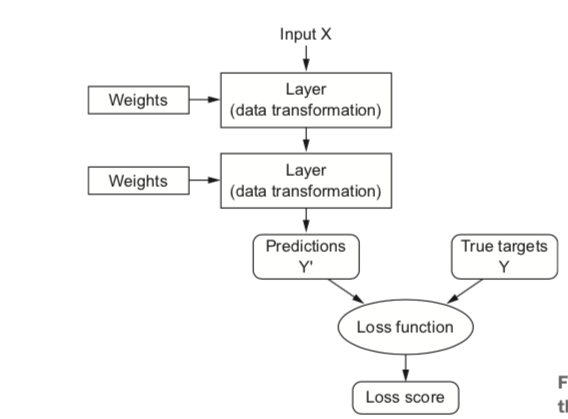

In [2]:
from IPython.display import Image
Image(filename='/Users/samarth/Desktop/Samarth/Data Sets/Deep Learning Scripts/Deep_Learning_Base.png')

# ------------------------------------------------------------------------------------------

###  1) Work Flow : Model Architecture - Compile - Fit

### 2) Understand tensors and attributes : number of axes, shape -  (60000, 28, 28)

   * Vector Data : 2D 
   * Time Series/Sequence Data : 3D 
   * Images : 4D
   * Video : 5D

### 3) Notion of batches : Mini batch/Stochastic 




# --------------------------------------------------------------------------------------------
## What are we achieving with deep learning?

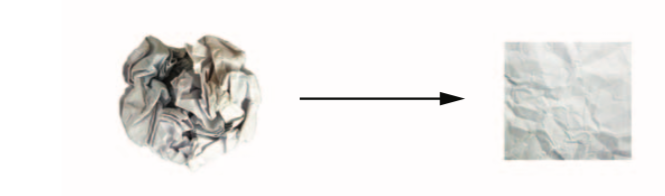

In [3]:
from IPython.display import Image
Image(filename='/Users/samarth/Desktop/Samarth/Data Sets/Deep Learning Scripts/intuition.png')

# -----------------------------------------------------------------------------------
## Understanding model families using KERAS :

### 1. Two - Branch Networks 
### 2. Multi-Input / Multi Output Networks
### 3.  Graphs of layers

# --------------------------------------------------------------------------------
## Next piece : Which loss functions/optimizers should I use and when?

### 1. Two-class classification : Binary Crossentropy
### 2. Multi-class classification : Categorical Crossentropy
### 3. Regression : Mean Squared Error (MSE)
### 4. True research problems : Need to develop your own objective functions 

# -------------------------------------------------------------------------------

## Lets talk Keras!

* Provides high Level building blocks for developing deep learning models
* Can be figured on Tensorflow/Theano/CNTK

###  Four Step Process for every model:

* Define training data : input and target sensors
* Define architecture (model) mapping targets to inputs
* Configure learning process : Define optimizer, loss function and metric
* Iterate through the data using fit()

## Example of a basic Keras Sequential model - IMDB Reviews 

In [4]:
# import libraries
import numpy as np

from keras.layers import Dense
from keras.models import Sequential

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Applications/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [5]:
# import data set
from keras.datasets import imdb

(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

In [6]:
#Check train and test data
print(train_data[0])
print(train_labels[0])

#Check max number of words in each review
max([max(sequence) for sequence in train_data])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


9999

In [7]:
#Decode words in review
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

"?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

In [8]:
#One Hot Encoding manually of review words
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [9]:
#Vectorize the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
#Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
#Define the model
model = Sequential()

model.add(Dense(16, activation = 'relu', input_shape= (10000,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [13]:
#Compile the model

model.compile(optimizer= 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

#cross entropy generally works well when dealing with probabilities as outputs

In [14]:
#Create a validation set from training

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:] 

In [15]:
#Fit the model

fit_model = model.fit(partial_x_train,partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 333us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 224us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3003 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.2179 - acc: 0.9286 - val_loss: 0.3087 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1750 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2842 - val_acc: 0.8871
Epoch 6/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3169 - val_acc: 0.8773
Epoch 7/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3126 - 

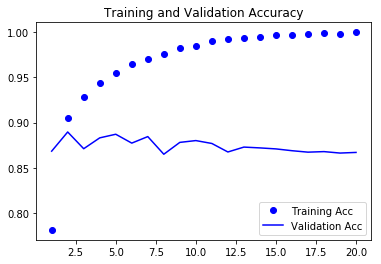

In [17]:
#Plot training and validation accuracy

import matplotlib.pyplot as plt

acc = fit_model.history['acc']
val_acc = fit_model.history['val_acc']
loss = fit_model.history['loss']
val_loss = fit_model.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()


### Parameters that could be changed for better results:

### 1. Increase hidden layers
### 2. Change the number of hidden units of each layer
### 3. loss function (mse can be used in this case)
### 4. Different activation functions (tanh can be used in place of relu)


### We just saw  a binary classifcation problem. Similar examples could be built for multi-classifcation problems. 

### Multiclassfication : 

* The end dense layer will have the number of hidden units equal to number of output classes.
* Loss function for multiclassification : categorical_crossentropy.

* Number of hidden units must be increased in proportion to output/input (Intuitive)

### Regression :

* Use Mean Squared Error (MSE) as loss function

# --------------------------------------------------------------------------------

## Preparing Data for Neural Networks

* Vectorization of data : based on image/text/video
* Data Normalization
* Missing values : imputing to zero works well in most cases
* Feature Engineering 

# --------------------------------------------------------------------------------

## Battling overfitting with Neural Networks

* Add more training data
* Reduce Network size
* Add Weight Regularization
* Add Dropout

### Model Using Weight Regularization


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.5618 - acc: 0.7840 - val_loss: 0.4359 - val_acc: 0.8673
Epoch 2/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.3664 - acc: 0.8936 - val_loss: 0.3664 - val_acc: 0.8796
Epoch 3/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.2938 - acc: 0.9195 - val_loss: 0.3327 - val_acc: 0.8908
Epoch 4/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.2562 - acc: 0.9314 - val_loss: 0.3432 - val_acc: 0.8804
Epoch 5/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.2298 - acc: 0.9407 - val_loss: 0.3468 - val_acc: 0.8809
Epoch 6/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.2155 - acc: 0.9477 - val_loss: 0.3360 - val_acc: 0.8860
Epoch 7/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.2051 - acc: 0.9493 - val_loss: 0.3426 - 

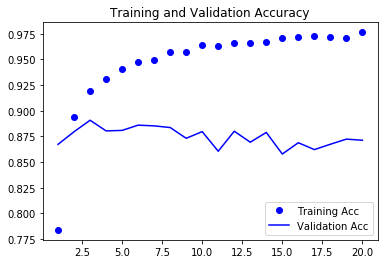

In [25]:
#Repeat model with weight regularization
#Penaly added only during training


from keras import regularizers
model = Sequential()

#Every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient value
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,))) 
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer= 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

fit_model = model.fit(partial_x_train,partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val,y_val))

acc = fit_model.history['acc']
val_acc = fit_model.history['val_acc']
loss = fit_model.history['loss']
val_loss = fit_model.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()



### Model Using Dropout

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 273us/step - loss: 0.6498 - acc: 0.6178 - val_loss: 0.5642 - val_acc: 0.7871
Epoch 2/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.5440 - acc: 0.7411 - val_loss: 0.4523 - val_acc: 0.8701
Epoch 3/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.4567 - acc: 0.8153 - val_loss: 0.3710 - val_acc: 0.8779
Epoch 4/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.3872 - acc: 0.8557 - val_loss: 0.3233 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.3337 - acc: 0.8823 - val_loss: 0.2985 - val_acc: 0.8859
Epoch 6/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.2958 - acc: 0.9011 - val_loss: 0.2817 - val_acc: 0.8887
Epoch 7/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.2519 - acc: 0.9161 - val_loss: 0.2707 - 

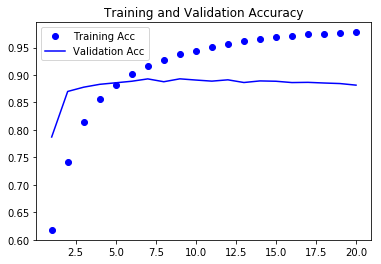

In [29]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer= 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

fit_model = model.fit(partial_x_train,partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val,y_val))

acc = fit_model.history['acc']
val_acc = fit_model.history['val_acc']
loss = fit_model.history['loss']
val_loss = fit_model.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()


### Recap loss functions/activation functions

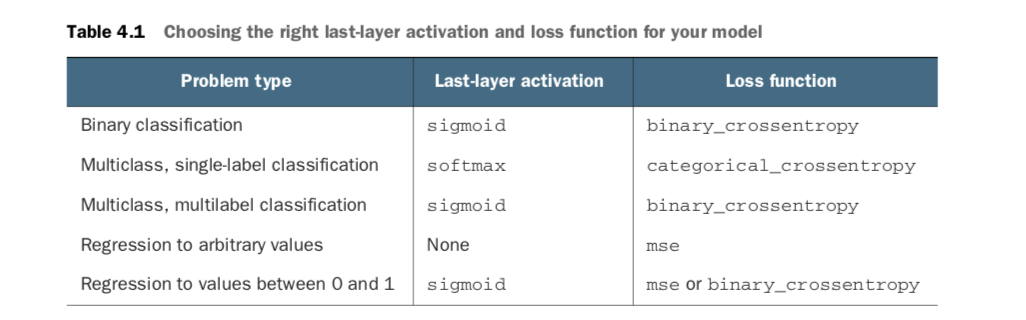

In [30]:
Image(filename='/Users/samarth/Desktop/Samarth/Data Sets/Deep Learning Scripts/Choices.png')

In [ ]:
# Different types of optimizers
# gradient descent - stochastic
# chain rule

#basic documentation for each layer
